<a href="https://colab.research.google.com/github/puwachat/Intern-Training/blob/main/Lesson01-LinearRegression/AI_DeepLearning_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Github clone

In [1]:
!git clone https://github.com/puwachat/Intern-Training

Cloning into 'Intern-Training'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 40 (delta 10), reused 21 (delta 2), pack-reused 0
Unpacking objects: 100% (40/40), done.


In [1]:
%cd Intern-Training/
!ls

/content/Intern-Training
Datasets  Lesson01-LinearRegression  My_model_1.h5  My_model_2.h5  README.md


# Import Lib

In [2]:
import tensorflow as tf
tf.__version__

'2.8.2'

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Datasets/01_insurance.csv')
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [5]:
feature_columns = ['age','bmi','children']
one_hot_columns = ['sex','smoker','region']
target_columns  =  ['expenses']

In [6]:
x_part1 = df[feature_columns]
x_part1

,age,bmi,children
0,19,27.9,0
1,18,33.8,1
2,28,33.0,3
3,33,22.7,0
4,32,28.9,0
...,...,...,...
1333,50,31.0,3
1334,18,31.9,0
1335,18,36.9,0
1336,21,25.8,0


# one-hot vs normal

original x_part2

In [7]:
x_part2 = df[one_hot_columns]
x_part2

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


one_hot_part2

In [8]:
x_part2_one_hot = pd.get_dummies(df[one_hot_columns])
x_part2_one_hot

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,0,1,1,0,0,1,0,0
1334,1,0,1,0,1,0,0,0
1335,1,0,1,0,0,0,1,0
1336,1,0,1,0,0,0,0,1


concat x-part1, x-part2

In [9]:
x = pd.concat([x_part1, x_part2_one_hot], axis=1)
x

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,1,0,0,1,0,0,0,1
1,18,33.8,1,0,1,1,0,0,0,1,0
2,28,33.0,3,0,1,1,0,0,0,1,0
3,33,22.7,0,0,1,1,0,0,1,0,0
4,32,28.9,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,0,1,1,0,0,1,0,0
1334,18,31.9,0,1,0,1,0,1,0,0,0
1335,18,36.9,0,1,0,1,0,0,0,1,0
1336,21,25.8,0,1,0,1,0,0,0,0,1


In [10]:
y = df[target_columns]
y

,expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86
...,...
1333,10600.55
1334,2205.98
1335,1629.83
1336,2007.95


# train test split

In [11]:
x_train, x_test, y_train, y_test= train_test_split(x, y, train_size = 0.75, random_state=888)

In [12]:
x_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
748,47,36.0,1,1,0,1,0,0,0,0,1
526,19,30.6,2,1,0,1,0,0,1,0,0
833,58,34.4,0,0,1,1,0,0,1,0,0
229,47,25.5,2,0,1,1,0,1,0,0,0
1192,58,32.4,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1139,19,32.5,0,1,0,0,1,0,1,0,0
1174,29,32.1,2,0,1,1,0,0,1,0,0
1263,43,29.9,1,1,0,1,0,0,0,0,1
493,61,43.4,0,0,1,1,0,0,0,0,1


In [13]:
len(x_train.columns)

11

In [14]:
y_train

,expenses
748,8556.91
526,24059.68
833,11743.93
229,9225.26
1192,13019.16
...,...
1139,36898.73
1174,4433.92
1263,7337.75
493,12574.05


# Scaled Dataset

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

x_scaler = StandardScaler()
x_train_sc = x_scaler.fit_transform(x_train.to_numpy())
x_test_sc = x_scaler.transform(x_test.to_numpy())

y_scaler = StandardScaler()
y_train_sc = y_scaler.fit_transform(y_train.to_numpy())
y_test_sc = y_scaler.transform(y_test.to_numpy())

# Deep Model Experiment

## Experiment 1 : base line

### define model

In [16]:
model_name = "My_model_1"

# Set random seed
tf.random.set_seed(888)

# Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.Input(shape=(len(x_train.columns),)),  # input
    tf.keras.layers.Dense(10),  # layer
    tf.keras.layers.Dense(1),   # output
], name = f"{model_name}")

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mse is short for mean square error
              optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-3)
              )

# print model architecture
model.summary()

Model: "My_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Fit the model
history = model.fit(x_train_sc, y_train_sc, 
                    validation_data = (x_test_sc, y_test_sc),
                    epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 6ms/step - loss: 1.0538 - val_loss: 0.7728
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7770 - val_loss: 0.5318
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5336 - val_loss: 0.3429
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3463 - val_loss: 0.2444
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3067 - val_loss: 0.2447
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3031 - val_loss: 0.2493
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2977 - val_loss: 0.2515
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2938 - val_loss: 0.2550
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2910 - val_loss: 0.2572
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2845 - val_loss: 0.2616
Epoch 11/

### Evaluate Model

In [18]:
model.evaluate(x_test_sc, y_test_sc)

11/11 [==============================] - 0s 3ms/step - loss: 0.2758


0.27578914165496826

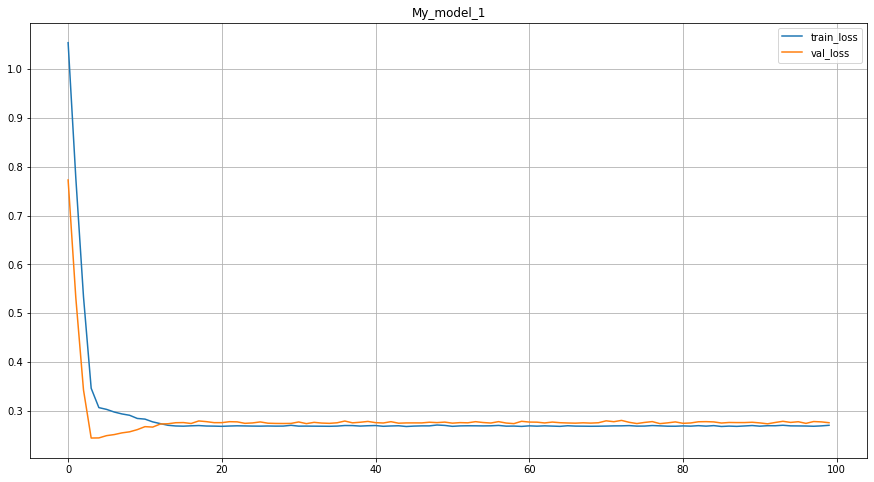

In [19]:
plt.figure(figsize=(15,8))
plt.title(f"{model_name}")
plt.grid()
plt.plot(history.history['loss'], label = "train_loss")
plt.plot(history.history['val_loss'], label = "val_loss")
plt.legend()
plt.show()

### save model

In [20]:
model.save(f"{model_name}.h5")

### load model

In [21]:
model_Load = tf.keras.models.load_model(f"{model_name}.h5")
model_Load.summary()

Model: "My_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [22]:
model_Load.evaluate(x_test_sc, y_test_sc)

11/11 [==============================] - 0s 2ms/step - loss: 0.2758


0.27578914165496826

### predict

In [23]:
y_pred_sc = model.predict(x_test_sc)
y_pred = y_scaler.inverse_transform(y_pred_sc)
y_pred

array([[8.81441309e+03],
       [4.11958789e+03],
       [3.35230560e+02],
       [3.90398633e+04],
       [1.25363066e+04],
       [2.40151474e+02],
       [7.46583130e+02],
       [1.29444980e+04],
       [3.71471875e+03],
       [1.85573254e+03],
       [6.35182764e+03],
       [4.65530273e+03],
       [3.37299414e+03],
       [5.96879297e+03],
       [1.13857588e+04],
       [9.24636621e+03],
       [1.31141914e+04],
       [2.43167188e+03],
       [1.11202246e+04],
       [1.28976113e+04],
       [2.99379199e+03],
       [1.11422686e+04],
       [2.52380859e+03],
       [4.56558398e+04],
       [1.18581650e+04],
       [1.14738809e+04],
       [1.71197083e+03],
       [1.23902754e+04],
       [8.58020215e+03],
       [1.11992998e+04],
       [1.29444590e+04],
       [6.75765747e+02],
       [1.04310996e+04],
       [1.10374268e+04],
       [4.04056016e+04],
       [1.19341309e+04],
       [1.03339941e+04],
       [6.76335986e+03],
       [5.06122656e+03],
       [8.70360059e+03],


In [24]:
y_pred_df = pd.DataFrame(y_pred, columns = ["y_pred"])
y_pred_df

,y_pred
0,8814.413086
1,4119.587891
2,335.230560
3,39039.863281
4,12536.306641
...,...
330,10528.453125
331,12182.439453
332,4275.070312
333,8019.052246


In [25]:
result_df = pd.concat([y_pred_df, y_test.reset_index(drop=True)], axis = 1)
result_df

,y_pred,expenses
0,8814.413086,8347.16
1,4119.587891,3943.60
2,335.230560,1705.62
3,39039.863281,18767.74
4,12536.306641,13555.00
...,...,...
330,10528.453125,10370.91
331,12182.439453,12648.70
332,4275.070312,4349.46
333,8019.052246,7518.03


### Evaluate result

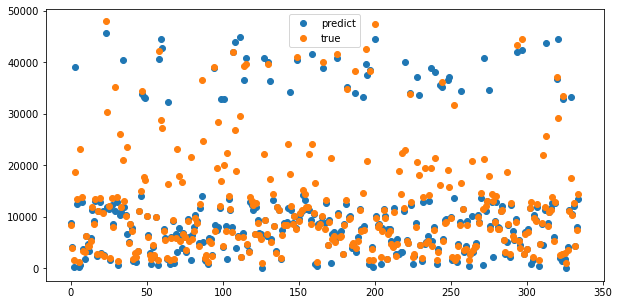

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(x = result_df.index, y = result_df['y_pred'], label = "predict")
plt.scatter(x = result_df.index, y = result_df['expenses'], label = "true")
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_values = mean_absolute_error(y_true = y_test.to_numpy(),
                                                    y_pred = y_pred)
mse_values = mean_squared_error(y_true = y_test.to_numpy(),
                                                    y_pred = y_pred)

print(f"MAE : {round(mae_values,2)}, MSE : {round(mse_values,2)}")

MAE : 3499.59, MSE : 52811177.58


## Experiment 2 : Upgrade model

### define model

In [32]:
model_name = "My_model_2"

# Set random seed
tf.random.set_seed(888)

# Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.Input(shape=(len(x_train.columns),)),
    tf.keras.layers.Dense(1024),
    tf.keras.layers.Dense(1),
], name = f"{model_name}")

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mse is short for mean square error
              optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-3),
              metrics=["mse"])

# print model architecture
model.summary()

Model: "My_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1024)              12288     
                                                                 
 dense_9 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 13,313
Trainable params: 13,313
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Fit the model
history = model.fit(x_train_sc, y_train_sc, 
                    validation_data = (x_test_sc, y_test_sc),
                    epochs = 300,
                )

Epoch 1/300
32/32 [==============================] - 1s 12ms/step - loss: 0.3575 - mse: 0.3408 - val_loss: 0.2873 - val_mse: 0.3204
Epoch 2/300
32/32 [==============================] - 0s 7ms/step - loss: 0.2993 - mse: 0.2972 - val_loss: 0.3272 - val_mse: 0.3455
Epoch 3/300
32/32 [==============================] - 0s 8ms/step - loss: 0.2950 - mse: 0.3108 - val_loss: 0.2886 - val_mse: 0.2784
Epoch 4/300
32/32 [==============================] - 0s 4ms/step - loss: 0.2968 - mse: 0.2896 - val_loss: 0.2962 - val_mse: 0.3805
Epoch 5/300
32/32 [==============================] - 0s 3ms/step - loss: 0.2889 - mse: 0.2948 - val_loss: 0.3026 - val_mse: 0.3682
Epoch 6/300
32/32 [==============================] - 0s 3ms/step - loss: 0.2915 - mse: 0.3012 - val_loss: 0.2923 - val_mse: 0.3389
Epoch 7/300
32/32 [==============================] - 0s 4ms/step - loss: 0.2969 - mse: 0.3036 - val_loss: 0.2826 - val_mse: 0.2914
Epoch 8/300
32/32 [==============================] - 0s 3ms/step - loss: 0.2827 - 

### Evaluate Model

In [34]:
model.evaluate(x_test_sc, y_test_sc)

11/11 [==============================] - 0s 2ms/step - loss: 0.2731 - mse: 0.3024


[0.27308547496795654, 0.3023700416088104]

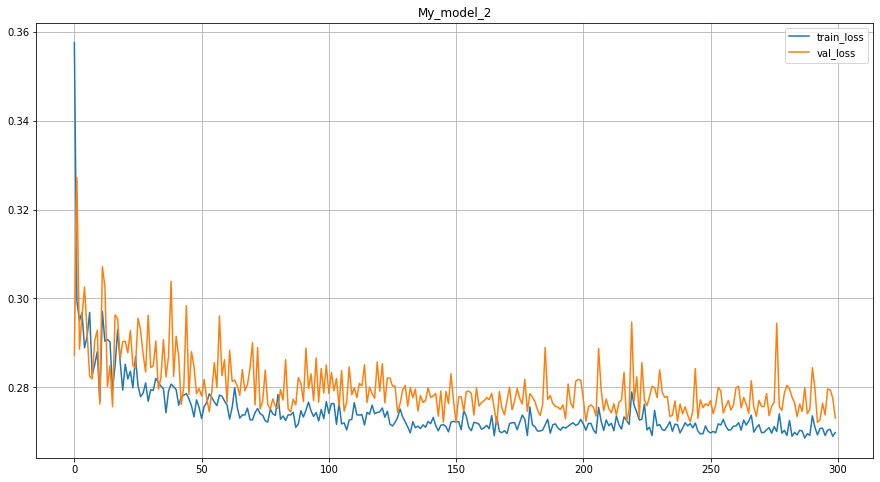

In [35]:
plt.figure(figsize=(15,8))
plt.title(f"{model_name}")
plt.grid()
plt.plot(history.history['loss'], label = "train_loss")
plt.plot(history.history['val_loss'], label = "val_loss")
plt.legend()
plt.show()

### save model

In [36]:
model.save(f"{model_name}.h5")

### load model

In [37]:
model_Load = tf.keras.models.load_model(f"{model_name}.h5")
model_Load.summary()

Model: "My_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1024)              12288     
                                                                 
 dense_9 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 13,313
Trainable params: 13,313
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.evaluate(x_test_sc, y_test_sc)

11/11 [==============================] - 0s 2ms/step - loss: 0.2731 - mse: 0.3024


[0.27308547496795654, 0.3023700416088104]

### predict

In [39]:
y_pred_sc = model.predict(x_test_sc)
y_pred = y_scaler.inverse_transform(y_pred_sc)

In [40]:
y_pred_df = pd.DataFrame(y_pred, columns = ["y_pred"])
y_pred_df

,y_pred
0,9389.123047
1,4605.417969
2,1142.776489
3,38175.445312
4,13164.261719
...,...
330,10804.750000
331,12542.102539
332,4639.857422
333,8147.513672


In [41]:
result_df = pd.concat([y_pred_df, y_test.reset_index(drop=True)], axis = 1)
result_df

,y_pred,expenses
0,9389.123047,8347.16
1,4605.417969,3943.60
2,1142.776489,1705.62
3,38175.445312,18767.74
4,13164.261719,13555.00
...,...,...
330,10804.750000,10370.91
331,12542.102539,12648.70
332,4639.857422,4349.46
333,8147.513672,7518.03


### Evaluate result

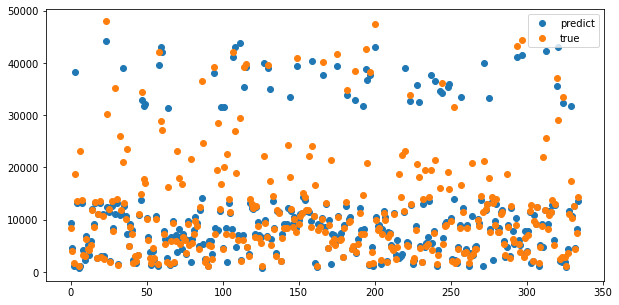

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(x = result_df.index, y = result_df['y_pred'], label = "predict")
plt.scatter(x = result_df.index, y = result_df['expenses'], label = "true")
plt.legend()
plt.show()

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_values = mean_absolute_error(y_true = y_test.to_numpy(),
                                                    y_pred = y_pred)
mse_values = mean_squared_error(y_true = y_test.to_numpy(),
                                                    y_pred = y_pred)

print(f"MAE : {round(mae_values,2)}, MSE : {round(mse_values,2)}")

MAE : 3465.28, MSE : 48687497.15
